<a href="https://colab.research.google.com/github/ducphuongbk01/Brain-Tumor-Segmentation/blob/master/Traffic_Light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://osf.io/4pwj8/

In [ ]:
# File management

# Download file from google drive link 
!gdown 1yd8XmrLeKL25bBdxqVHm9wFcbD4VQnQP

# Zip folder from mounting drive
!zip -r traffic_light.zip phuong_share_file/*

In [ ]:
#Check gpu run time
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available())

In [12]:
# !gdown 1ePiEcRNAf_nBGkRcUvIyZ8picW9Kna0g # DriveU.zip
# !gdown 1FhL6pzAhV5JYKxKrORLEP_zNZvT7J9Q7 # LARA.zip
# !gdown 1-6-sRgOJFuxz2Ce6cJxbO75J-YDPQJiH # lisa_traffic_light_dataset.zip
# !gdown 1AYq1Tg1vnvlPMD4vPFeVtFpVuPXH_3Ba # S2TLD.zip
# !gdown 1-fKLfFza58FHIAR-K4ADAd43lEtTiwh1 # test_bstld.zip
# !gdown 1_tQu7NSLVL11O-cJZQ7oI6K7wJQpLZWM # train_bstld.zip
!gdown 1jxXAmV_EiNDqqdOO-OMAcgjE9VR_wEfV

# !unzip DriveU.zip
# !unzip LARA.zip
# !unzip S2TLD.zip
# !unzip lisa_traffic_light_dataset.zip
# !unzip test_bstld.zip
# !unzip train_bstld.zip
# !unzip /content/drive/MyDrive/Project/TrafficLight/Nguyen/data/traffic_light_4000.zip
# !unzip /content/drive/MyDrive/Project/TrafficLight/Nguyen/data/test_tflight_overal.zip
# !unzip /content/new.zip
# !unzip /content/drive/MyDrive/Project/TrafficLight/A_Tung/trafficlight_classifier_v2.zip
!unrar x -y data.rar

Streaming output truncated to the last 5000 lines.
Extracting  data/validation/y/data_generate_77702_003865.jpg              99%  OK 
Extracting  data/validation/y/data_generate_77706_000371.jpg              99%  OK 
Extracting  data/validation/y/data_generate_7770_002593.jpg               99%  OK 
Extracting  data/validation/y/data_generate_77712_005459.jpg              99%  OK 
Extracting  data/validation/y/data_generate_77720_002856.jpg              99%  OK 
Extracting  data/validation/y/data_generate_77723_003015.jpg              99%  OK 
Extracting  data/validation/y/data_generate_77726_003523.jpg              99%  OK 
Extracting  data/validation/y/data_generate_77732_000944.jpg              99%  OK 
Extracting  data/validation/y/data_generate_77734_003391.jpg              99%  OK 
Extracting  data/validation/y/data_generate_77742_008058.jpg              99%  OK 
Extracting  data/validation/y

In [ ]:
!rm -r -f /content/test_bstld /content/test_bstld.zip

In [6]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.figure()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()

In [8]:
!unzip /content/drive/MyDrive/Project/TrafficLight/A_Tung/trafficlight_classifier_v2.zip

Archive:  /content/drive/MyDrive/Project/TrafficLight/A_Tung/trafficlight_classifier_v2.zip
   creating: appendix/
  inflating: appendix/trafficlightmini.py  
  inflating: appendix/trafficlightmini.h5  
   creating: demoimg/
  inflating: demoimg/demooutput.png  
  inflating: demoimg/nightdemo.png   
  inflating: README.md               
  inflating: trafficlight.py         
  inflating: trafficlightfull.h5     
  inflating: videoplayback.mp4       


In [31]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

# Model Class
class TrafficLightNetModel():
  def __init__(self, input_shape, num_classes):
    super(TrafficLightNetModel, self).__init__()

    self.input_shape = input_shape
    self.num_classes = num_classes
    
    #Input block
    input = keras.Input(shape=self.input_shape)

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    # Set aside residual
    previous_block_activation = x  

    for size in [32, 64, 128]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
        # Add back residual
        x = layers.add([x, residual])  
        # Set aside next residual
        previous_block_activation = x  

    x = layers.SeparableConv2D(512, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    prev_x = x

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dense(512, activation="sigmoid")(x)

    x = tf.reshape(x, [-1, 1, 1, 512])

    x = x * prev_x

    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.5)(x)

    output = layers.Dense(self.num_classes, activation="sigmoid")(x)

    self.model =  keras.Model(input, output)

    # print(self.model.summary())

  def load_model(self, model_path):
    try:
      self.model.load_weights(model_path)
      return True
    except:
      return False

  def imageProcessing(self, img, input_size):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = tf.cast(img, tf.float32)
    img /= 255.0
    img = tf.image.resize(img, size=input_size)
    return img

  def predict(self, img, conf_thresh=[0.5, 0.5, 0.5], single_lb=False, verbose=0):
    labels = []
    img_pred = self.imageProcessing(img, (75, 75))

    pred = self.model.predict(np.array([img_pred]), verbose=verbose)

    if single_lb:
      max_idx = tf.math.argmax(pred[0])
      if max_idx==0:
        labels = 'r'
      elif max_idx==1:
        labels = 'y'
      elif max_idx==2:
        labels = 'g'
      else:
        labels = 'n'
    else:
      if pred[0,0] >= conf_thresh[0]:
        labels.append('r')
      if pred[0,1] >= conf_thresh[1]:
        labels.append('y')
      if pred[0,2] >= conf_thresh[2]:
        labels.append('g')
      if pred[0,0] < conf_thresh[0] and pred[0,1] < conf_thresh[1] and pred[0,2] < conf_thresh[2]:
        labels.append('n')

    conf_scores = pred[0]

    return labels, conf_scores

  def train_model(self, path_save, x_train, y_train, epochs, batch_size, x_val, y_val, verbose=1):
    self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=["accuracy"])

    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=path_save,
                                                      verbose=1,
                                                      monitor="val_accuracy",
                                                      save_best_only=True)
    
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
                 tf.keras.callbacks.TensorBoard(log_dir="logs"),
                 checkpointer]

    # print(self.model.summary())

    results = self.model.fit(
                              x_train, 
                              y_train, 
                              batch_size,
                              epochs,
                              verbose=verbose,
                              callbacks=callbacks,
                              validation_split=0.1,
                              validation_data=(x_val, y_val),
                              shuffle=True
                              )
    
    print("Finished training")

  def train_model(self, path_save, ds_train, epochs, batch_size, ds_val, verbose=1):
    self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=["accuracy"])

    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=path_save,
                                                      verbose=1,
                                                      monitor="val_accuracy",
                                                      save_best_only=True)
    
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
                 tf.keras.callbacks.TensorBoard(log_dir="logs"),
                 checkpointer]

    results = self.model.fit(ds_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks, validation_data=ds_val)
    print("Finished training")

    return results
    
    

  def evaluate_model(self, test_datapath:str, conf_thresh=[0.5, 0.5, 0.5], single_lb=False):
    test_data_path_lst = glob(test_datapath + "/image/*.jpg")
    test_label_path = test_datapath + "/gt/"

    labels = []
    predicts = []
    conf_scores = []

    for i, path in enumerate(test_data_path_lst):
      name = getFileName(path)
      img = cv2.imread(path)
      pred, score = self.predict(img, conf_thresh=conf_thresh, single_lb=single_lb)
      labels.append(getTXTDetail(test_label_path + name + ".txt"))
      predicts.append(pred)
      conf_scores.append(score)

    return labels, predicts, conf_scores

  def model_summary(self):
    print(self.model.summary())

      

In [32]:
md = TrafficLightNetModel((75, 75, 3), 4)

md.model_summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_60 (Conv2D)             (None, 38, 38, 32)   896         ['input_13[0][0]']               
                                                                                                  
 batch_normalization_108 (Batch  (None, 38, 38, 32)  128         ['conv2d_60[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation_108 (Activation)    (None, 38, 38, 32)   0           ['batch_normalization_108[

In [8]:
from google.colab.patches import cv2_imshow
import albumentations as A
import random

# Data Generate
data_transform = A.Compose([
                          A.VerticalFlip(p=0.5),
                          A.HorizontalFlip(p=0.5),
                          A.RandomSnow(p=0.5),
                          A.RandomRain(p=0.5),
                          A.augmentations.geometric.rotate.Rotate(limit=[-30,30],p=0.5),
                          A.augmentations.transforms.MotionBlur(blur_limit=7, p=0.5),
                          A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
                          ])
def generateData(data_lst:list, lb_lst:list, ratio=2):
  data_lst_tmp = data_lst.copy()
  lb_lst_tmp = lb_lst.copy()
  for i, img in enumerate(data_lst):
    for j in range(ratio-1):
      img2 = data_transform(image=img)["image"]
      data_lst_tmp.append(img2)
      lb_lst_tmp.append(lb_lst[i])
  return data_lst_tmp, lb_lst_tmp

def balanceData(data_lst:list, lb_lst:list):
  data_lst_tmp = data_lst.copy()
  lb_lst_tmp = lb_lst.copy()

  r_data = []
  y_data = []
  g_data = []
  n_data = [] 
  for i, img in enumerate(data_lst):
    if((lb_lst[i] == np.array([1, 0, 0, 0])).all()):
      r_data.append(i)
    elif ((lb_lst[i] == np.array([0, 1, 0, 0])).all()):
      y_data.append(i)
    elif ((lb_lst[i] == np.array([0, 0, 1, 0])).all()):
      g_data.append(i)
    else:
      n_data.append(i)

  num_r = len(r_data)
  num_y = len(y_data)
  num_g = len(g_data)
  num_n = len(n_data)

  num_max = max([num_r, num_y, num_g, num_n])

  for num, lst_data in zip([num_r, num_y, num_g, num_n], [r_data, y_data, g_data, n_data]):
    diff = num_max - num

    lst = random.choices(lst_data, k=diff)

    for i in lst:
      img2 = data_transform(image=data_lst[i])["image"]
      data_lst_tmp.append(img2)
      lb_lst_tmp.append(lb_lst[i])

    r = 0
    y = 0
    g = 0
    n = 0
    for i, img in enumerate(data_lst_tmp):
      if((lb_lst_tmp[i] == np.array([1, 0, 0, 0])).all()):
        r+=1
      elif ((lb_lst_tmp[i] == np.array([0, 1, 0, 0])).all()):
        y+=1
      elif ((lb_lst_tmp[i] == np.array([0, 0, 1, 0])).all()):
        g+=1
      else:
        n+=1

  print("After balance")

  print(str(r) + " images in red class")
  print(str(y) + " images in yellow class")
  print(str(g) + " images in green class")
  print(str(n) + " images in none class")

  return data_lst_tmp, lb_lst_tmp

In [9]:
# Data
from sklearn.model_selection import train_test_split
from glob import glob

IMG_SIZE = 75

lb_name_lst = {'r': np.array([1, 0, 0, 0]).astype(np.float32), 'y': np.array([0, 1, 0, 0]).astype(np.float32), 
               'g': np.array([0, 0, 1, 0]).astype(np.float32), 'n': np.array([0, 0, 0, 1]).astype(np.float32)}

def getFileName(path):
  return path.split('/')[-1].split('.')[0]

def getTXTDetail(txt_path:str):
  txt_file = open(txt_path)
  detail = txt_file.read()
  txt_file.close()
  return detail

def dataSet(data_path_lst:list, augment_ratio=2, ratio=0.8):

  data_imgs = []
  labels = []

  r_c = 0
  y_c = 0
  g_c = 0
  n_c = 0

  for data_path in data_path_lst:
    img_lst = glob(data_path + "/image/*.jpg")
    lb_path = data_path + "/gt"

    for path in img_lst:   
        image = cv2.imread(path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
        image = np.float32(image)
        image /= 255.0

        label = getTXTDetail(lb_path + "/"  + getFileName(path) + ".txt")

        if label == 'r':
          r_c+=1
        elif label == 'y':
          y_c+=1
        elif label == 'g':
          g_c+=1
        else:
          n_c+=1

        data_imgs.append(image)
        labels.append(lb_name_lst[label])

  print("Found " + str(len(data_imgs)) + " images" )

  print(str(r_c) + " images in red class")
  print(str(y_c) + " images in yellow class")
  print(str(g_c) + " images in green class")
  print(str(n_c) + " images in none class")

  
  data_imgs, labels = balanceData(data_imgs, labels)

  data_imgs, labels = generateData(data_imgs, labels, ratio=augment_ratio)

  data_imgs = np.array(data_imgs)
  labels = np.array(labels)

  print("Generate " + str(data_imgs.shape[0]) + " images using for training and validation" )

  X_train, X_test, Y_train, Y_test = train_test_split(data_imgs, labels, test_size=(1.0-ratio), random_state=42)

  print(str(X_train.shape[0]) + " will be used for training")
  print(str(X_test.shape[0]) + " will be used for validation")
  return X_train, X_test, Y_train, Y_test

In [10]:
def aug_fn(image, img_size):
  data = {"image":image}
  aug_data = data_transform(**data)
  aug_img = aug_data["image"]
  aug_img = tf.cast(aug_img/255.0, tf.float32)
  aug_img = tf.image.resize(aug_img, size=[img_size, img_size])
  return aug_img

def process_data(image, label, img_size):
  aug_img = tf.numpy_function(func=aug_fn, inp=[image, img_size], Tout=tf.float32)
  return aug_img, np.array([label])


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from functools import partial

train_path = "/content/data/train/"
val_path = "/content/data/validation/"
SEED = 999
AUTOTUNE = tf.data.experimental.AUTOTUNE

def preprocessing_image(x):
  img = data_transform(image=x)['image']
  return img

data_gen = ImageDataGenerator(
                              rotation_range=90,
                              rescale=1./255.,
                              preprocessing_function=preprocessing_image,
                              data_format='channels_last',
                              validation_split=0.0,
                              interpolation_order=1,
                              dtype=None
                              )

data_gen2 = ImageDataGenerator(
                              rescale=1./255
                              )

ds_train = data_gen.flow_from_directory(train_path,
                                        classes=['r', 'y', 'g', 'n'],
                                        class_mode='categorical',
                                        color_mode='rgb',
                                        batch_size=32,
                                        target_size=(75, 75),
                                        shuffle=True                                      
                                        )
ds_val = data_gen2.flow_from_directory(val_path,
                                      classes=['r', 'y', 'g', 'n'],
                                      class_mode='categorical',
                                      color_mode='rgb',
                                      batch_size=32,
                                      target_size=(75, 75),
                                      shuffle=False                                     
                                      )

# ds_val = image_dataset_from_directory(val_path,
#                                     labels='inferred',
#                                     label_mode='categorical',
#                                     class_names=['r', 'y', 'g', 'n'],
#                                     color_mode='rgb',
#                                     batch_size=32,
#                                     image_size=(75, 75),
#                                     shuffle=False,
#                                     seed=SEED                                  
#                                     )
# def processing(x, y):
#   x/=255.0
#   return x, y

# ds_val = ds_val.map(processing)

Found 465072 images belonging to 4 classes.
Found 116268 images belonging to 4 classes.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_val.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

In [33]:
tf_model = TrafficLightNetModel((75, 75, 3), 4)

# tfModel.load_model("/content/trafficlight_classifier_v2/trafficlightfull.h5")

path_save = "/content/drive/MyDrive/Project/TrafficLight/Model/new_best_model_0.h5"

tf_model.train_model(path_save=path_save, ds_train=ds_train, epochs=100, batch_size=32, ds_val=ds_val, verbose=1)

Epoch 1/100
  292/14534 [..............................] - ETA: 2:25:39 - loss: 0.5875 - accuracy: 0.2628

KeyboardInterrupt: ignored

In [ ]:
# Visualize Data
import matplotlib.pyplot as plt
import random

dataPath_lst = ["/content/traffic_light_4000"]

X_train, X_test, Y_train, Y_test = dataSet(dataPath_lst, 
                                           augment_ratio=5, ratio=0.8)

plt.figure(figsize=(10, 10))

rand_idx = random.sample(range(0, X_train.shape[0]), 16)

for i, idx in enumerate(rand_idx):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow((X_train[idx]*255.0).astype("uint8"))
  if (Y_train[idx] == np.array([1, 0, 0, 0])).all():
    plt.title("red")
  elif (Y_train[idx] == np.array([0, 1, 0, 0])).all():
    plt.title("yellow")
  elif (Y_train[idx] == np.array([0, 0, 1, 0])).all():
    plt.title("green")
  else:
    plt.title("off")
  
  plt.axis("off")

In [ ]:
# Tranining

tfModel = TrafficLightNetModel((75, 75, 3), 4)

tfModel.load_model("/content/trafficlight_classifier_v2/trafficlightfull.h5")

# dataPath_lst = ["/content/drive/MyDrive/Project/TrafficLight/Nguyen/data/traffic_light_4000",
#                 "/content/S2TLD",
#                 "/content/LARA"]

# X_train, X_test, Y_train, Y_test = dataSet(dataPath_lst, 
#                                            augment_ratio=2, ratio=0.8)

path_save = "/content/drive/MyDrive/Project/TrafficLight/Model/best_model_pretrain0.h5"

tfModel.train_model(path_save=path_save, x_train=X_train, y_train=Y_train, epochs=100, batch_size=32, 
                    x_val=X_test, y_val=Y_test, verbose=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
# Testing

tfModel = TrafficLightNetModel((75, 75, 3), 4)

path = "/content/drive/MyDrive/Project/TrafficLight/Model/best_model5.h5"

# path = "/content/drive/MyDrive/Project/TrafficLight/Model/best_model_pretrain0.h5"

tfModel.load_model(path)

lbs = []
gts = []

for path in tqdm(glob("/content/test_bstld/legible/image/*.jpg")):

  lb_path = path.replace('image', 'gt')
  lb_path = lb_path.replace('jpg', 'txt')

  img = cv2.imread(path)

  labels, conf_scores = tfModel.predict(img, conf_thresh=[0.5, 0.5, 0.5], single_lb=True)

  gt = getTXTDetail(lb_path)

  lbs.append(labels)
  gts.append(gt)

cnf_matrix = confusion_matrix(gts, lbs)
plot_confusion_matrix(cnf_matrix, classes=['r', 'y', 'g', 'n'],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues)

In [ ]:
!unzip /content/new.zip

In [ ]:
from sklearn.metrics import confusion_matrix

tfModel = TrafficLightNetModel((75, 75, 3), 4)

tfModel.load_model("/content/drive/MyDrive/Project/TrafficLight/Model/best_model_pretrain0.h5")

test_datapath = "/content/new"
labels, predicts, conf_scores = tfModel.evaluate_model(test_datapath, conf_thresh=[0.8, 0.8, 0.8], single_lb=True)

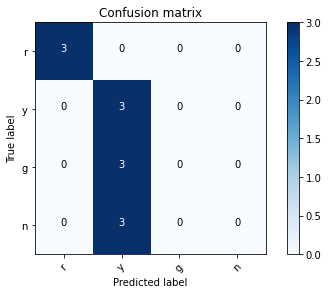

In [ ]:
cnf_matrix = confusion_matrix(labels, predicts)
plot_confusion_matrix(cnf_matrix, classes=['r', 'y', 'g', 'n'],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues)

In [ ]:
for i in range(len(predicts)):
  if(len(predicts[i])>1):
    print(conf_scores[i])
    print(predicts[i])
    print(labels[i])

In [ ]:
print(labels)
print(predicts)

In [ ]:
print(getTXTDetail("/content/traffic_light_4000/gt/" + getFileName("/content/traffic_light_4000/image/01051.jpg") + ".txt"))


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import albumentations as A
import random
from glob import glob
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
import shutil

# Data Generate
data_transform = A.Compose([
                            A.VerticalFlip(p=0.5),
                            A.HorizontalFlip(p=0.5),
                            A.RandomSnow(p=0.5),
                            A.RandomRain(p=0.5),
                            A.augmentations.geometric.rotate.Rotate(limit=[-30,30],p=0.5),
                            A.augmentations.transforms.MotionBlur(blur_limit=7, p=0.5),
                            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
                          ])

# Ham can kiem tra
def get_file_name(path):
    return path.split('/')[-1].split('.')[0]


def generateData(data_lst:list, lb_lst:list, ratio=2):
    data_lst_tmp = data_lst.copy()
    lb_lst_tmp = lb_lst.copy()
    for i, img in enumerate(data_lst):
        for j in range(ratio-1):
            img2 = data_transform(image=img)["image"]
            data_lst_tmp.append(img2)
            lb_lst_tmp.append(lb_lst[i])
    return data_lst_tmp, lb_lst_tmp


def balanceData(data_path:str):

    data_path_lst = {'r': glob(data_path + "/r/*jpg"),
                     'y': glob(data_path + "/y/*jpg"),
                     'g': glob(data_path + "/g/*jpg"),
                     'n': glob(data_path + "/n/*jpg")
                    }

    num_r = len(data_path_lst['r'])
    num_y = len(data_path_lst['y'])
    num_g = len(data_path_lst['g'])
    num_n = len(data_path_lst['n'])

    num_max = max([num_r, num_y, num_g, num_n])

    for num, lb in zip((num_r, num_y, num_g, num_n), ('r', 'y', 'g', 'n')):
        diff_num = num_max - num
        lst_path = random.choices(data_path_lst[lb], k=diff_num)

        for i, path in enumerate(lst_path):

            try:
                name = get_file_name(path)

                new_save_path = data_path + "/" + lb + "/" + "data_generate_" + str(i) + "_" + name + ".jpg" 

                img = cv2.imread(path)
                img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img2 = data_transform(image=img1)["image"]
                img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

                cv2.imwrite(new_save_path, img2)
            except:
                print(path)

    num_r_after = len(glob(data_path + "/r/*jpg"))
    num_y_after = len(glob(data_path + "/y/*jpg"))
    num_g_after = len(glob(data_path + "/g/*jpg"))
    num_n_after = len(glob(data_path + "/n/*jpg"))

    print("Before balance...")
    print("Red class: " + str(num_r))
    print("Yellow class: " + str(num_y))
    print("Green class: " + str(num_g))
    print("None class: " + str(num_n))
    print("After balance...")
    print("Red class: " + str(num_r_after))
    print("Yellow class: " + str(num_y_after))
    print("Green class: " + str(num_g_after))
    print("None class: " + str(num_n_after))

    print("------------Finished--------------")


def data_filter(data_path:str, threshold:int):
    data_path_lst = glob(data_path + "/*/*.jpg")

    for path in tqdm(data_path_lst):
        img = cv2.imread(path)
        if min(img.shape) < threshold:
            os.remove(path)

def image_size_statistic(data_path:str):
    data_path_lst = glob(data_path + "/*/*.jpg")

    arr = []

    for path in tqdm(data_path_lst):
        img = cv2.imread(path)

        min_d = min(img.shape)
        arr.append(min_d)

    # Creating histogram
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(arr, bins = range(0, 5, 1))
    
    # Show plot
    plt.show()


def separate_data(raito:float, data_path:str):
    data_path_lst = {'r': glob(data_path + "/r/*jpg"),
                     'y': glob(data_path + "/y/*jpg"),
                     'g': glob(data_path + "/g/*jpg"),
                     'n': glob(data_path + "/n/*jpg")
                    }

    num = int(raito*len(data_path_lst['r']))

    for lb in ('r', 'y', 'g', 'n'):
        data_lst = data_path_lst[lb]

        lst = random.sample(data_lst, k=num)
        for path in tqdm(lst):
            dest = path.replace('total', 'train')
            shutil.move(path, dest)
    
    os.rename(data_path, data_path.replace("total", "validation"))
    print("Finished...")

def check_data(data_path:str):
    for phase in ("train", "validation"):
        print(phase + ":")
        print("Red class: " + str(len(glob(data_path + "/" + phase + "/r/*jpg"))))
        print("Yellow class: " + str(len(glob(data_path + "/" + phase + "/y/*jpg"))))
        print("Green class: " + str(len(glob(data_path + "/" + phase + "/g/*jpg"))))
        print("None class: " + str(len(glob(data_path + "/" + phase + "/n/*jpg"))))
        



def main():
    data_path = "/home/phuongdoan/Phuong/Traffic_Project"

    check_data(data_path)



if __name__ == "__main__":
    main()